In [1]:
%run base.ipynb
import gym
import matplotlib.pyplot as plt

from abides_gym_market_making_environment_v1 import *
from policies_v1 import SigPolicy
from train_v1 import train
import utils

In [2]:
# register market making env for gym use 
from gym.envs.registration import register

register(
    id="market-making-v1",
    entry_point=SubGymMarketsMarketMakingEnv_v1,
)

def generate_env(seed):
    """
    generates specific environment with the parameters defined and set the seed
    """
    env = gym.make(
            "market-making-v1",
            background_config="rmsc04",
            mkt_close="11:45:00",
            timestep_duration="10s",
            order_fixed_size=10,
            first_interval="00:13:00",
            max_inventory=100,
            remaining_inventory_reward=-100,#penalty
            inventory_reward_dampener=0.6,
            damp_mode="asymmetric",
            debug_mode=False
        )

    env.seed(seed)
    
    return env

In [3]:
# create the environment
env = generate_env(5)

In [4]:
episodes = 10
lr = 0.01
window_length = 12
eps = 0.9
eps_decay = utils.linear_decay(epochs=7_000, start=eps, end=0.2)

sigpolicy = SigPolicy(env, 2)
sigpolicy.initialize_parameters(zero_bias=True)

results = train(env, 
                sigpolicy, 
                episodes,
                discount=0.97,
                learning_rate=lr, 
                epsilon=eps,
                epsilon_decay=eps_decay,
                window_length=window_length, 
                printing=False)

print(sigpolicy.linear.weight.data)


  0%|          | 0/10 [00:00<?, ?it/s]Epsiode 0 | step 200 | reward 0.5925000000000001 | loss 0.0509586515801177
Q values: tensor([0.3530, 0.3514, 0.3345], grad_fn=<SelectBackward>)
Epsiode 0 | step 400 | reward 1.9849999999999977 | loss 0.09304290410225247
Q values: tensor([0.5077, 0.4796, 0.5011], grad_fn=<SelectBackward>)
Epsiode 0 | step 600 | reward 3.8815 | loss 0.17151774463656166
Q values: tensor([0.8708, 0.9241, 0.8966], grad_fn=<SelectBackward>)
Epsiode 0 | step 793 | reward 5.731499999999996 | loss 0.6531299427136632
Q values: tensor([0.8286, 0.8091, 0.8156], grad_fn=<SelectBackward>)
 10%|█         | 1/10 [00:48<07:15, 48.39s/it]Epsiode 1 | step 200 | reward 0.9415000000000002 | loss 0.1313458760288313
Q values: tensor([0.8294, 0.8215, 0.8104], grad_fn=<SelectBackward>)
Epsiode 1 | step 400 | reward 2.976499999999998 | loss 0.24850437201775044
Q values: tensor([0.8282, 0.8548, 0.8206], grad_fn=<SelectBackward>)
Epsiode 1 | step 600 | reward 4.341499999999999 | loss 0.312092

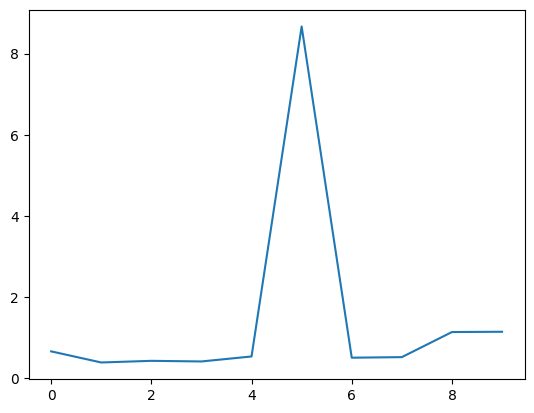

In [10]:
plt.plot(results["losses"])
#plt.plot(results["losses"])
#plt.plot([reward if reward > -2000 else 0 for reward in results["rewards"]])

hist = list(results["history"])
#plt.plot(np.array(hist)[:,3])


In [ ]:
import pickle

# write results 
with open('../results/error.pkl', 'wb') as f:  # open a text file
    pickle.dump(results, f) # serialize the list
f.close()

In [ ]:
import pickle

# load results
with open('../results/500_runs.pkl', 'rb') as f:
    deserialized_results = pickle.load(f)
f.close()

In [ ]:
#plt.plot(deserialized_results["rewards"])
#plt.plot(results["losses"])
plt.plot([reward if reward > -2000 else 0 for reward in deserialized_results["rewards"]])

hist = list(deserialized_results["history"])
#plt.plot(np.array(hist)[:,3])